# 1. Exploración de Datos

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar Dataset 
wine_quality = fetch_ucirepo(id=186) 

In [5]:
# Juntar columas X e y para la exploración
data = pd.concat([wine_quality.data.features,  wine_quality.data.targets], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


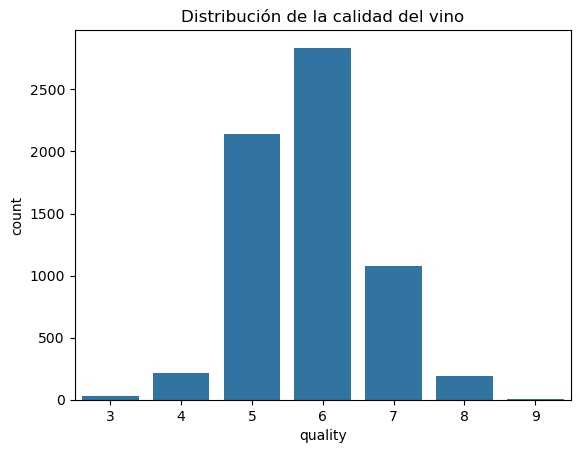

In [13]:
# Visualizar distribución de la calidad
sns.countplot(x='quality', data=data)
plt.title('Distribución de la calidad del vino')
plt.show()

In [15]:
data['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Se puede observar como la mayoría de los vinos están clasificados con calidad 6 o 5, por lo que los datos están desbalanceados, siendo dificil para el modelo predecir para la calidad 3 o 9
Si bien existen outliers que se podrían eliminar, estos podrían afectar considerablemente a las clases minoritarias

<function matplotlib.pyplot.show(close=None, block=None)>

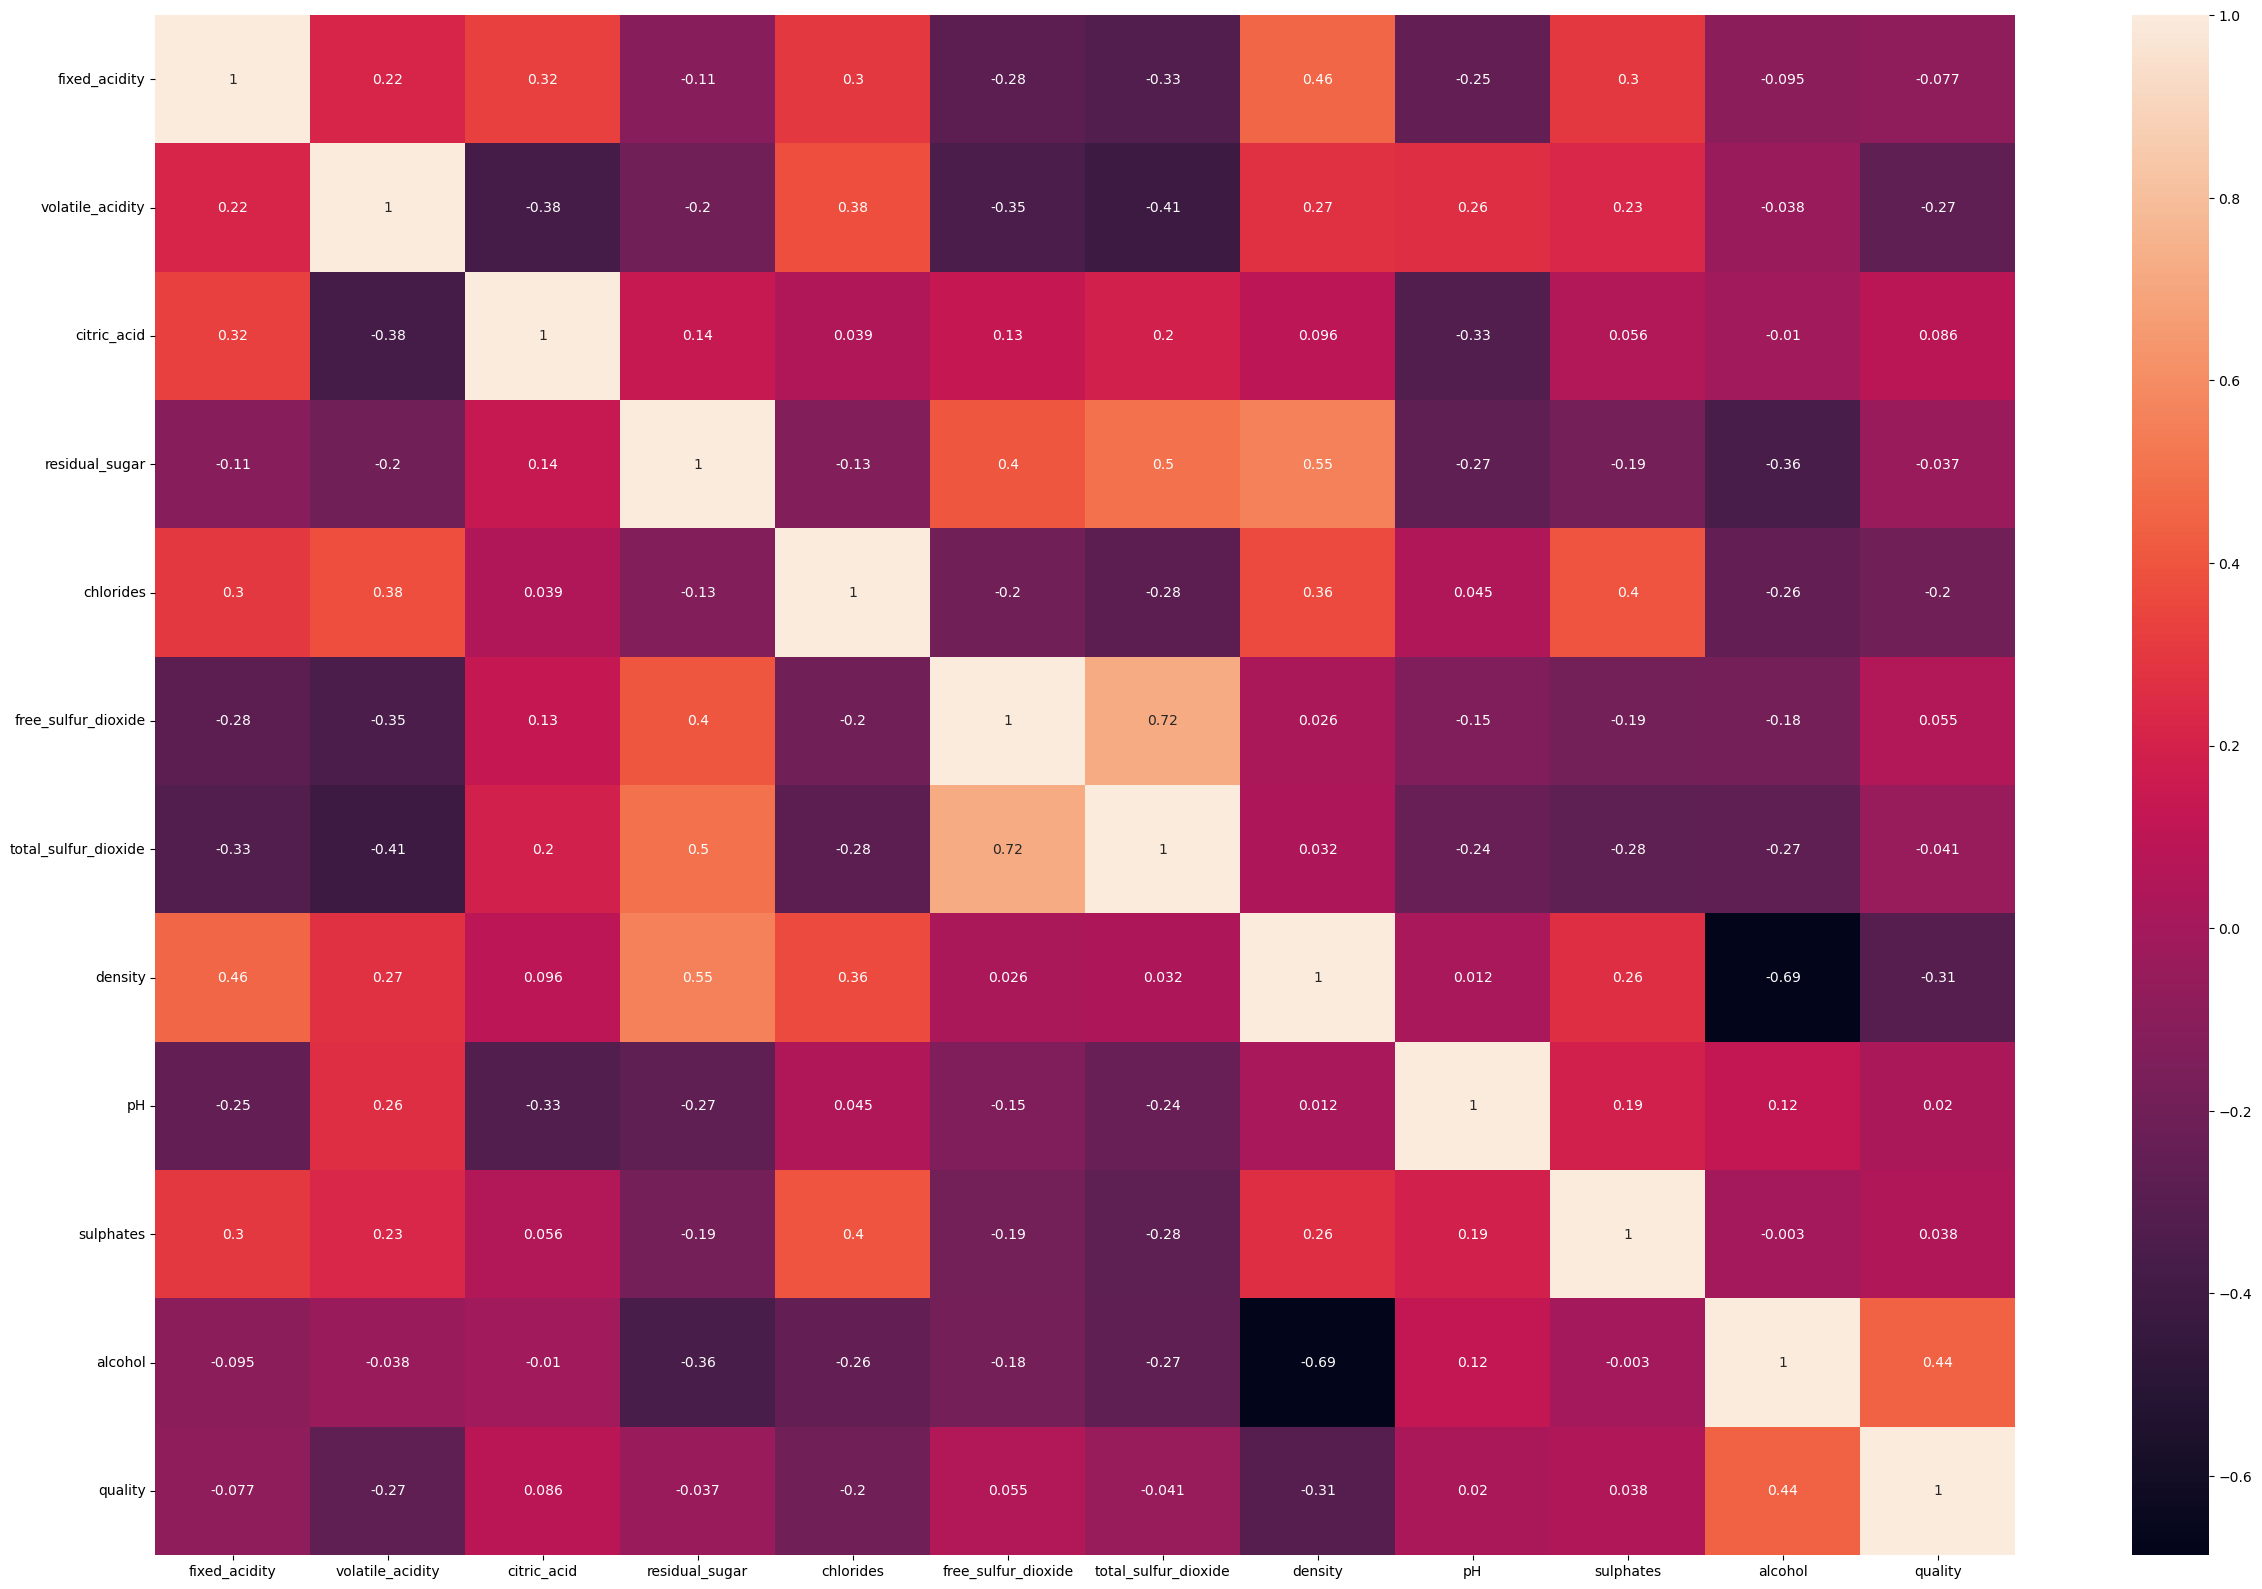

In [18]:
plt.figure(figsize=(30,20))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show

### ¿Qué significa cada variable?
- **fixed_acidity (acidez fija):** Ácidos no volátiles que no se evaporan fácilmente, como el ácido tartárico y málico. Aportan al sabor y estabilidad del vino.
- **volatile_acidity (acidez volátil):** Se refiere principalmente al ácido acético (como el del vinagre). En pequeñas cantidades es normal, pero si es muy alta, indica deterioro del vino.
- **citric_acid	(ácido cítrico):** Presente naturalmente en algunas uvas. Añade frescura y sabor. También puede ayudar a prevenir la bacteriación.
- **residual_sugar (azúcar residual):** Es el azúcar que queda después de la fermentación. Los vinos secos tienen poca, los dulces tienen más. Influye en el sabor.
- **chlorides (cloruros):** Representan la cantidad de sal en el vino (generalmente cloruro de sodio). Exceso puede dar un sabor salado o amargo.
- **free_sulfur_dioxide (dióxido de azufre libre):** Parte del SO₂ que está disponible para proteger el vino contra bacterias y oxidación. Es el más "activo" en términos de protección.
- **total_sulfur_dioxide (dióxido de azufre total):** Incluye el SO₂ libre y el combinado. Un conservante común en vinos, pero en exceso puede dar aromas no deseados.
- **density (densidad):** Relación entre masa y volumen del vino. Puede indicar contenido de azúcar o alcohol. Un vino más dulce suele ser más denso.
- **pH:** Mide la acidez o alcalinidad. pH bajo = vino más ácido. No debe confundirse con la acidez total. Es importante para la estabilidad y sabor.
- **sulphates (sulfatos):** Añadidos a veces como conservantes. También pueden tener un rol en la estabilidad microbiológica del vino. En pequeñas cantidades no afectan el sabor.
- **quality (calidad):** calificación sensorial del vino dada por catadores expertos en una escala de 0 a 10.
- **color:** Indica si el vino es tinto (red) o blanco (white).

Si bien dióxido de azufre libre se encuentra dentro del dióxido de azufre total, generando una fuerte relación entre ambas variables, no es lo suficientemente alta como para que la eliminemos.

# 2. Técnica de validación

Utilizamos la técnica de validación cruzada, ya que ayuda a mitigar el sobreajuste, proporciona estimaciones más confiables del rendimiento del modelo, maximiza el uso de los datos y, durante la búsqueda de hiperparámetros, obtiene una mejor evaluación de qué combinaciones de parámetros conducen a un modelo más generalizable y estable.

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
X = data.drop(columns = 'quality')
y = data['quality']

In [55]:
# Aplicamos el escalado 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [57]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%), asegurando que todas las clases estén presentes en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

In [59]:
print(f"Distribución de clases en test: \n{y_test.value_counts()}")

Distribución de clases en test: 
quality
6    567
5    428
7    216
4     43
8     39
3      6
9      1
Name: count, dtype: int64


# 3. Desbalanceo

Sobremuestreo a las clases minoritarias con imbalanced-learn. Utilizamos SMOTE porque a diferencia del random no genera tanto sobreajuste y es menos costos computacionalmente en comparación con adasyn

In [63]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
print(f"Distribución original de clases: \n{y_train.value_counts()}")
print(f"Distribución después de ADASYN: \n{y_train_resampled.value_counts()}")

Distribución original de clases: 
quality
6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: count, dtype: int64
Distribución después de ADASYN: 
quality
5    2269
6    2269
7    2269
4    2269
8    2269
3    2269
9    2269
Name: count, dtype: int64


# 4. Clasificación

Utilizamos Random Forest, ya que permite ajustar automáticamente la importancia de las clases mediante class_weight, ayudando a que el modelo no se sesgue hacia la clase mayoritaria, reduciendo el riesgo de sobreajuste y generalizando mejor en presencia de clases desbalanceadas.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Definir los parámetros a ajustar para el Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_features': ['sqrt', 'log2', None],
}

# Crear el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Búsqueda aleatoria usando balanced_accuracy
random_search = RandomizedSearchCV(
    rf, param_grid, n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='balanced_accuracy', random_state=123
)
random_search.fit(X_train_resampled, y_train_resampled)

print(f"Mejores parámetros: {random_search.best_params_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}


In [72]:
# Definir el modelo de Random Forest con los mejores hiperparámetros
model = RandomForestClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    criterion=random_search.best_params_['criterion'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    class_weight=random_search.best_params_['class_weight'],
    max_features=random_search.best_params_['max_features'],
    random_state=42
)

# Entrenar el modelo
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [73]:
# Realizar predicciones
y_hat = model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_hat, zero_division=0))


Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       0.24      0.26      0.25        43
           5       0.70      0.74      0.72       428
           6       0.68      0.65      0.67       567
           7       0.60      0.62      0.61       216
           8       0.41      0.31      0.35        39
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1300
   macro avg       0.45      0.39      0.41      1300
weighted avg       0.65      0.65      0.65      1300



# 5. Regresión

Utilizamos Random Forest nuevamente, ya que combina múltiples árboles de decisión, lo que mejora la precisión y reduce el sobreajuste al promediar los resultados.

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir los hiperparámetros a probar
param_dist = {
    'n_estimators': [50, 100, 200],  
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Crear el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20, 
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Mejor modelo encontrado
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predecir con el mejor modelo
y_pred_rf = best_rf.predict(X_test)

# Calcular MAE, MSE y R²
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
print(f'MAE - Mejor Random Forest: {mae_rf}')
print(f'MSE - Mejor Random Forest: {mse_rf}')
print(f'R² - Mejor Random Forest: {r2_rf}')


MAE - Mejor Random Forest: 0.453306774902448
MSE - Mejor Random Forest: 0.3991487741264578
R² - Mejor Random Forest: 0.4771956146761631
